In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cvlib

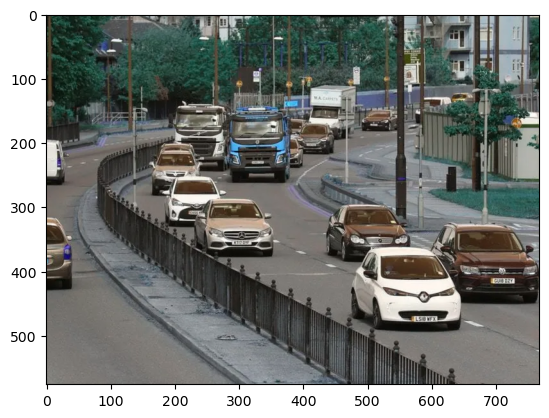

Number of cars in this image are 0


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

image = cv2.imread("cars1.webp")
box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of cars in this image are " + str(label.count('car')))

In [19]:
import cv2
import numpy as np

image=cv2.imread("cars1.webp")
detector=cv2.SimpleBlobDetector_create()

keypoints=detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image,keypoints,blank,(255,0,0),cv2.DRAW_MATCHES_FLAGS_DEFAULT)
print(len(keypoints))
cv2.imshow("Blobs",blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

22


### Arabaları sayamadı

In [14]:
import cv2
import numpy as np

image=cv2.imread("lilium.jpg")
detector=cv2.SimpleBlobDetector_create()

keypoints=detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image,keypoints,blank,(255,0,0),cv2.DRAW_MATCHES_FLAGS_DEFAULT)
print(len(keypoints))
cv2.imshow("Blobs",blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

9


### Resimdeki zambakları saydı

In [12]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

img=cv2.imread('students.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces=face_classifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
    print("No faces / eye found")
    
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h),(127,0,255),2)
    cv2.imshow("Face Detection",img)
    cv2.waitKey(0)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh),(255,255,0),2)
    cv2.imshow("Eye Detection",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3644\2026270005.py:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


### Resimdeki yüzleri ve gözleri buldu.

In [15]:
import cv2
import numpy as np
from time import sleep
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')
def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        sleep(.05)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    img = cv2.flip(img,1)
    return img
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3644\2352412060.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


### Bu kodda da kendi yüzümüzü ve gözleri buldu.

In [ ]:
# CNN Classifier-Görüntü Sınıflandırma Modeli

In [21]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [22]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [23]:
X_train_full.shape

(60000, 28, 28)

In [24]:
X_train_full.dtype

dtype('uint8')

Veri kümesinin zaten bir eğitim kümesi ve bir test kümesine bölünmüş olduğunu ancak doğrulama kümesi olmadığından şimdi bir tane oluşturacağımızı unutmayın. Ayrıca YSA'yı Gradient Descent kullanarak eğiteceğimiz için giriş özelliklerini ölçeklendirmemiz gerekiyor. Basit olması açısından piksel yoğunluklarını 255,0'a bölerek 0-1 aralığına ölçeklendireceğim:

In [25]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

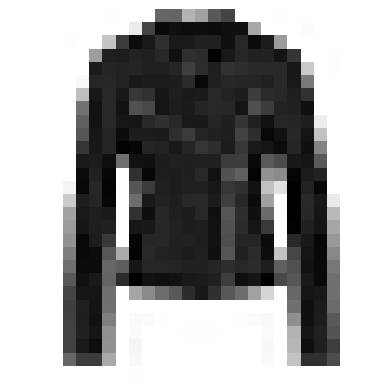

In [27]:
plt.imshow(X_train[9], cmap="binary")
plt.axis('off')
plt.show()

MNIST ile etiketin 5'e eşit olması görselin el yazısıyla yazılan 5. rakamını temsil ettiği anlamına gelir. Ancak Fashion MNIST için neyle uğraştığımızı bilmek için sınıf adları listesine ihtiyacımız var:

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [30]:
class_names[y_train[9]]

'Coat'

In [31]:
X_valid.shape

(5000, 28, 28)

NameError: name 'save_fig' is not defined

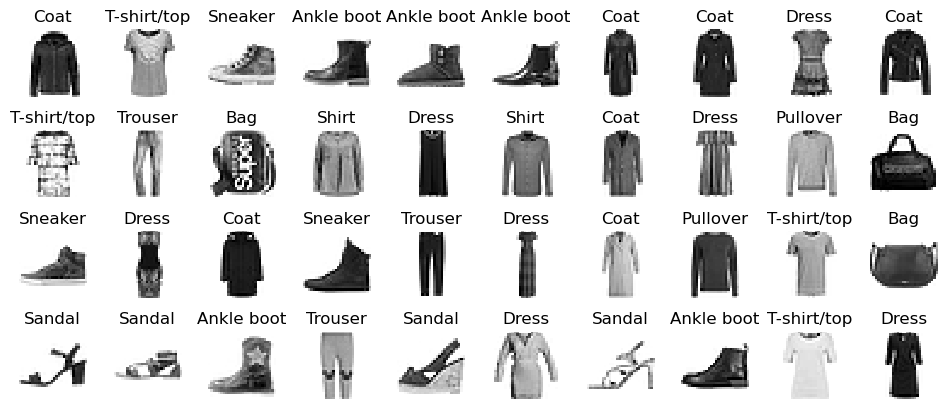

In [32]:
#Veri kümesindeki görsellerin bir örneğine göz atalım:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [33]:
# İşte bir örnek save_fig işlevi:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [ ]:
#Şimdi sinir ağını oluşturalım. İşte iki gizli katmana sahip bir MLP sınıflandırması:

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [39]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [41]:
model.get_layer(hidden1.name) is hidden1

True

In [42]:
weights, biases = hidden1.get_weights()

In [44]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [46]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7091 - accuracy: 0.7650 - val_loss: 0.5221 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4824 - accuracy: 0.8296 - val_loss: 0.4318 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4376 - accuracy: 0.8462 - val_loss: 0.5406 - val_accuracy: 0.7960
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4114 - accuracy: 0.8560 - val_loss: 0.3936 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3930 - accuracy: 0.8620 - val_loss: 0.3755 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8674 - val_loss: 0.3678 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3621 - accuracy: 0.8719 - val_loss: 0.3643 - val_accuracy:

Saving figure keras_learning_curves_plot


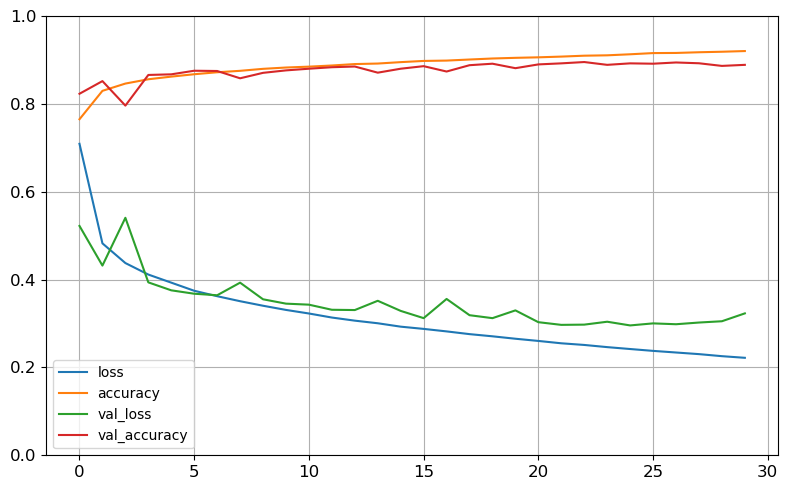

In [47]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
# Tahminlerde Bulunmak için Modeli Kullanın

In [48]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [50]:
y_pred = model.predict(X_new)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

1/1 [==============================] - 0s 30ms/step


array([9, 2, 1], dtype=int64)

In [52]:
predicted_class_names = [class_names[i] for i in y_pred_classes]

Saving figure fashion_mnist_images_plot


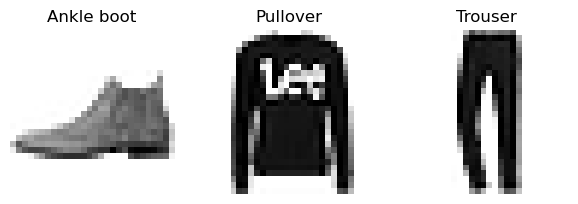

In [53]:
y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()